In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.ticker as tck

### read band and process

In [15]:
containing_folder = ""
with open(containing_folder+'REFORMATTED_BAND.dat', 'r') as f:
    s = f.read().rstrip()

In [16]:
s_split = s.split('\n')[1:]
band_matrix = []
for i in s_split:
    band_matrix.append([float(j) for j in i.split()])
k_path = np.array([band_matrix[i][0] for i in range(len(band_matrix))])
band = np.zeros((len(k_path), len(band_matrix[0])-1))
for i in range(len(k_path)):
    band[i, :] = band_matrix[i][1:]

### read Kpoints and convert

In [17]:
containing_folder = ""
with open(containing_folder+'KPOINTS', 'r') as f:
    s = f.readlines()
intersection=int(s[1].split()[0])

line_index=3
symbol=[]
while(True):
    line_index+=1
    if line_index>=len(s):
        break
    if s[line_index]=='\n':
        continue
    symbol.append(s[line_index].split()[4].rstrip())

In [18]:
for i in range(len(symbol)):
    if symbol[i]=='GAMMA':
        symbol[i]='$\Gamma$'
# only gamma use \ and $ to output with latex

In [19]:
xtick_index=list(range(0,len(k_path),intersection))
xtick_index.append(len(k_path)-1)
xtick=k_path[xtick_index]

# this paragraph can't be changed, most letters don't use $ 
# because it would make letter italic
klabel=[]
for i in range(int(len(symbol)/2)):
    if i==0:
        klabel.append(symbol[0])
    elif symbol[2*i-1]!=symbol[2*i]:
        klabel.append(symbol[2*i-1]+'$|$'+symbol[2*i])
        # use $|$ instead of | because | was output to -, and I don't know why
    elif symbol[2*i-1]==symbol[2*i]:
        klabel.append(symbol[2*i])
klabel.append(symbol[-1])

### read DOS and process

In [28]:
containing_folder = ""
with open(containing_folder+'DOSCAR', 'r') as f:
    s = f.readlines()[6:]

In [29]:
DOS_matrix = []
for i in s:
    DOS_matrix.append([float(j) for j in i.rstrip().split()])
energy = np.array([DOS_matrix[i][0] for i in range(len(DOS_matrix))])
DOS = np.array([DOS_matrix[i][1] for i in range(len(DOS_matrix))])
integral_DOS = np.array([DOS_matrix[i][2] for i in range(len(DOS_matrix))])

### read fermi energy and correct

In [30]:
# correct DOS energy only
containing_folder = ""
with open(containing_folder+'FERMI_ENERGY', 'r') as f:
    s = f.readlines()[1]
fermi_energy = float(s.split()[0])

In [31]:
E=energy-fermi_energy

### plot band structure and DOS

In [34]:
fontsize = 10
fonts = {'family': 'Times New Roman', 'size': fontsize}
linewidth = 0.5
figsize=(3.149606,1.574803)
plt.rcParams['lines.linewidth']=linewidth
plt.rcParams['axes.linewidth']=linewidth
plt.rcParams['font.family']=fonts['family']
plt.rcParams['font.size']=fonts['size']
plt.rcParams['text.usetex']='True'
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['xtick.major.width']=linewidth
plt.rcParams['ytick.major.width']=linewidth
plt.rcParams['xtick.minor.width']=linewidth
plt.rcParams['ytick.minor.width']=linewidth
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ylimit=[-14,10]

In [35]:
xtick

array([0.    , 1.1494, 1.5557, 2.7748, 3.7702, 4.5829, 5.1576])

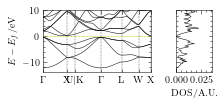

In [36]:
fig = plt.figure(figsize=figsize)
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[3, 1])

ax0 = fig.add_subplot(spec[0])
ax0.plot(k_path,band,'k')

ax0.set_ylabel(r'$E-E_f\rm/eV$')
ax0.set_ylim(ylimit)
ax0.set_xlim([k_path[0],k_path[-1]])
ax0.yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.tick_params(top='on', right='on', which='both')
plt.xticks(xtick,klabel,fontproperties=fonts)
ax0.hlines(0,k_path[0],k_path[-1],'y',linestyles='--')
ax0.vlines(xtick,*ylimit,colors='k',linestyles='-.',linewidth=0.6*linewidth)

ax1 = fig.add_subplot(spec[1])
ax1.plot(DOS, E,'k')
ax1.set_xlabel('DOS/A.U.')
ax1.set_yticklabels([])
ax1.set_xlim(left=0)
ax1.set_ylim(ylimit)
ax1.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
plt.tick_params(top='on', right='on', which='both')
plt.tight_layout()

In [37]:
fig.savefig(containing_folder+'band.jpg', dpi=600)